In [2]:
#import librarys


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
file_path = ('/content/data.csv')
df = pd.read_csv(file_path)
print(df.head())

df['Occupation'].unique()

          Income  Age  Dependents     Occupation City_Tier          Rent  \
0   44637.249636   49           0  Self_Employed    Tier_1  13391.174891   
1   26858.596592   34           2        Retired    Tier_2   5371.719318   
2   50367.605084   35           1        Student    Tier_3   7555.140763   
3  101455.600247   21           0  Self_Employed    Tier_3  15218.340037   
4   24875.283548   52           4   Professional    Tier_2   4975.056710   

   Loan_Repayment    Insurance     Groceries    Transport  ...  \
0        0.000000  2206.490129   6658.768341  2636.970696  ...   
1        0.000000   869.522617   2818.444460  1543.018778  ...   
2     4612.103386  2201.800050   6313.222081  3221.396403  ...   
3     6809.441427  4889.418087  14690.149363  7106.130005  ...   
4     3112.609398   635.907170   3034.329665  1276.155163  ...   

   Desired_Savings  Disposable_Income  Potential_Savings_Groceries  \
0      6200.537192       11265.627707                  1685.696222   
1     

array(['Self_Employed', 'Retired', 'Student', 'Professional'],
      dtype=object)

In [4]:
df.isnull().sum()

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Rent,0
Loan_Repayment,0
Insurance,0
Groceries,0
Transport,0


In [5]:
#convert whole dataset floats value in int datatype
for col in df.select_dtypes(include=['number']).columns:
  df[col] = df[col].astype(int)


print(df.dtypes)

df['Occupation'].unique()

Income                              int64
Age                                 int64
Dependents                          int64
Occupation                         object
City_Tier                          object
Rent                                int64
Loan_Repayment                      int64
Insurance                           int64
Groceries                           int64
Transport                           int64
Eating_Out                          int64
Entertainment                       int64
Utilities                           int64
Healthcare                          int64
Education                           int64
Miscellaneous                       int64
Desired_Savings_Percentage          int64
Desired_Savings                     int64
Disposable_Income                   int64
Potential_Savings_Groceries         int64
Potential_Savings_Transport         int64
Potential_Savings_Eating_Out        int64
Potential_Savings_Entertainment     int64
Potential_Savings_Utilities       

array(['Self_Employed', 'Retired', 'Student', 'Professional'],
      dtype=object)

In [6]:
df['Occupation'].unique()

array(['Self_Employed', 'Retired', 'Student', 'Professional'],
      dtype=object)

In [7]:
Occupation_map = {
    0 : 'Self_Employed',
    1 : 'Retired',
    2 : 'Student',
    3 : 'Professional'

}

df['Occupation_Label'] = df['Occupation'].map(Occupation_map)

In [8]:
#Its convert categorial data into number using lable encoder

from sklearn.preprocessing import LabelEncoder

# For Occupation
le_occupation = LabelEncoder()
df['Occupation'] = le_occupation.fit_transform(df['Occupation'])
occupation_mapping = dict(zip(le_occupation.classes_, le_occupation.transform(le_occupation.classes_)))
print("Label Encoding Mapping for Occupation:")
print(occupation_mapping)

# For City_Tier
le_city = LabelEncoder()
df['City_Tier'] = le_city.fit_transform(df['City_Tier'])
city_mapping = dict(zip(le_city.classes_, le_city.transform(le_city.classes_)))
print("Label Encoding Mapping for City_Tier:")
print(city_mapping)


Label Encoding Mapping for Occupation:
{'Professional': np.int64(0), 'Retired': np.int64(1), 'Self_Employed': np.int64(2), 'Student': np.int64(3)}
Label Encoding Mapping for City_Tier:
{'Tier_1': np.int64(0), 'Tier_2': np.int64(1), 'Tier_3': np.int64(2)}


In [11]:
#Feature enginnering


# ✅ Spending Total (all real expenses included)
df['Total_Expense'] = df[['Groceries', 'Transport', 'Eating_Out', 'Entertainment',
                          'Utilities', 'Healthcare', 'Education', 'Miscellaneous',
                          'Rent', 'Loan_Repayment', 'Insurance']].sum(axis=1)

# ✅ Total Potential Savings (automatically finds columns with 'Potential_Savings')
df['Total_Potential_Savings'] = df[[col for col in df.columns if 'Potential_Savings' in col]].sum(axis=1)

# ✅ Adjusted Income (what the user wants to save + what they can spend)
df['Effective_Income'] = df['Disposable_Income'] + df['Desired_Savings']


print(df[['Total_Expense', 'Total_Potential_Savings', 'Effective_Income']].head())



   Total_Expense  Total_Potential_Savings  Effective_Income
0          33366                     7006             17465
1          17178                     2958             11599
2          36472                     7094             20941
3          69835                    12152             48311
4          18605                     3016              8139


In [13]:
#what if person spend more than they should
df['Overspending'] = df['Total_Expense'] > df['Effective_Income']
print(df['Overspending'].head())


0    True
1    True
2    True
3    True
4    True
Name: Overspending, dtype: bool


In [14]:
#Budget prediction to predict next month expense using ml


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Example features and label
X = df[['Income', 'Age', 'Dependents', 'Effective_Income']]
y = df['Total_Expense']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
df['Predicted_Expense'] = model.predict(X)


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 1145.117466528596
Mean Squared Error (MSE): 3024735.124601823
Root Mean Squared Error (RMSE): 1739.1765651025266
R² Score: 0.9970160387306143


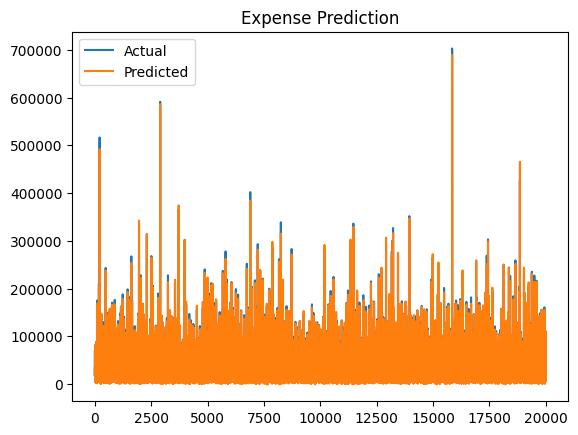

In [15]:
import matplotlib.pyplot as plt

plt.plot(df['Total_Expense'], label='Actual')
plt.plot(df['Predicted_Expense'], label='Predicted')
plt.legend()
plt.title("Expense Prediction")
plt.show()






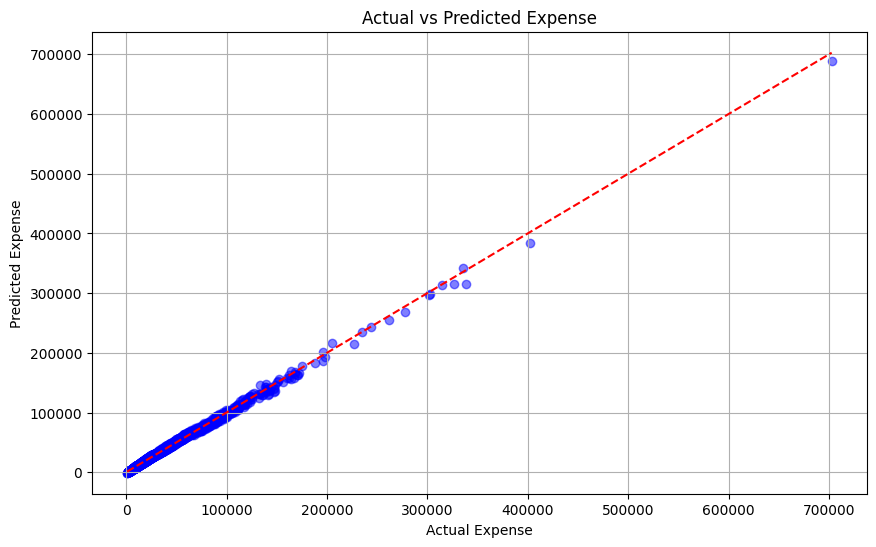

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Expense")
plt.ylabel("Predicted Expense")
plt.title("Actual vs Predicted Expense")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


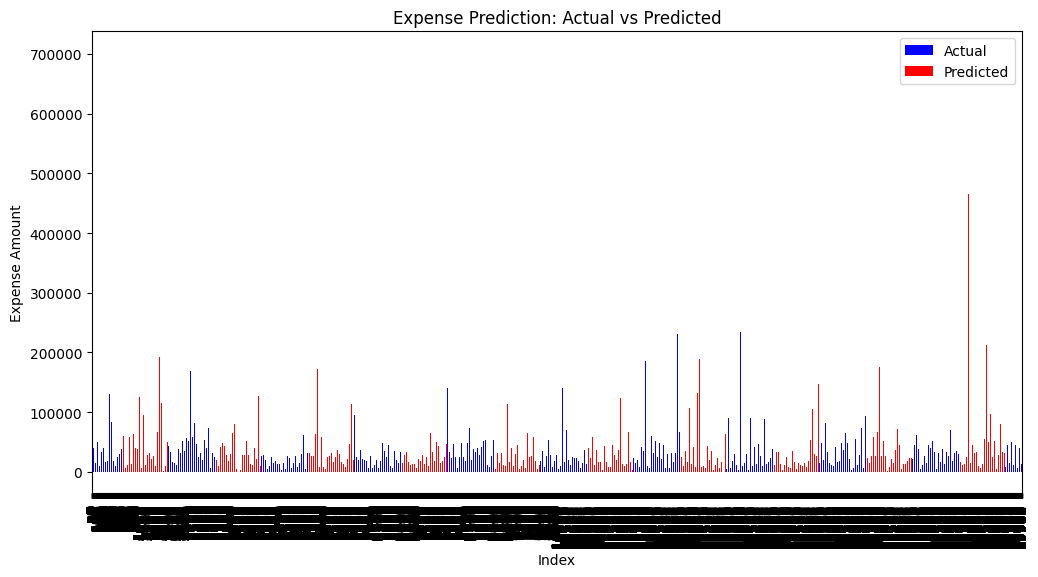

In [20]:
import matplotlib.pyplot as plt

# Bar chart for Actual vs Predicted Expenses
df[['Total_Expense', 'Predicted_Expense']].plot(kind='bar', figsize=(12, 6), color=['blue', 'red'])

# Add title and labels
plt.title('Expense Prediction: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Expense Amount')

# Show the legend
plt.legend(['Actual', 'Predicted'])

# Display the plot
plt.show()


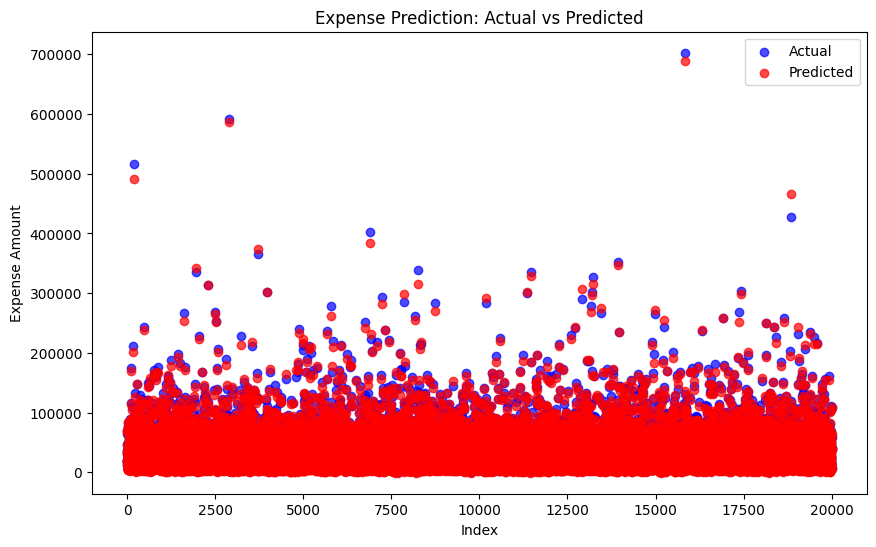

In [21]:
import matplotlib.pyplot as plt

# Scatter plot with customized color
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Total_Expense'], color='blue', label='Actual', alpha=0.7)
plt.scatter(df.index, df['Predicted_Expense'], color='red', label='Predicted', alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Expense Amount')
plt.title('Expense Prediction: Actual vs Predicted')
plt.legend()

# Show the plot
plt.show()
